# Classification with linear and logistic regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 

from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=100, centers= np.array([[-1],[1]]), n_features=1, shuffle=True, random_state=2017)

In [3]:
X

array([[ 1.89574884e+00],
       [ 7.79920722e-01],
       [-1.81726253e+00],
       [ 1.21276995e+00],
       [ 1.67422499e+00],
       [ 1.41544256e-01],
       [ 5.62827432e-01],
       [-1.84860918e+00],
       [ 3.06666159e-01],
       [ 7.25188274e-01],
       [-1.14213621e-01],
       [-7.17207488e-02],
       [-1.52824237e+00],
       [-5.55178535e-01],
       [ 2.75331995e-01],
       [-2.02294529e+00],
       [ 1.36476556e-01],
       [ 1.03133165e+00],
       [ 1.67705620e+00],
       [-1.35285906e+00],
       [ 4.71515882e-02],
       [ 9.88930042e-01],
       [-2.08933018e+00],
       [ 2.66876509e-01],
       [ 9.01562268e-01],
       [-1.01124513e+00],
       [ 1.03225343e+00],
       [-7.85546580e-01],
       [ 2.19533418e+00],
       [-1.48253414e+00],
       [ 4.46924733e-01],
       [-8.81973943e-02],
       [ 1.10784411e+00],
       [ 1.59405599e+00],
       [ 2.90456617e-01],
       [-8.51487191e-01],
       [-9.78157662e-01],
       [ 2.41916537e-01],
       [ 2.2

In [4]:
X.shape

(100, 1)

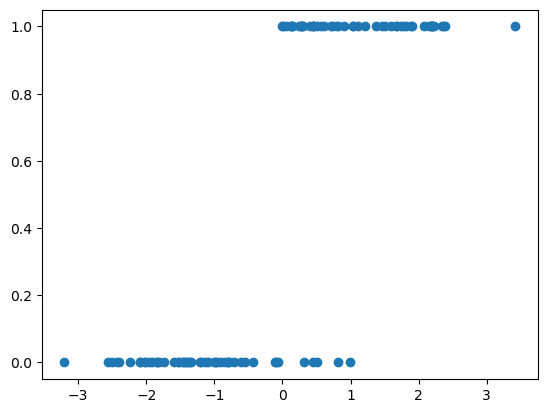

In [5]:
plt.scatter(X,y)

In [6]:
y

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1])

In [7]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [8]:
lr = LinearRegression().fit(X,y)
xgrid = np.linspace(-3.5,3.5, 1000)
Xgrid = xgrid.reshape(-1,1)
Y = y.reshape(-1,1)
yp = lr.predict(Xgrid)

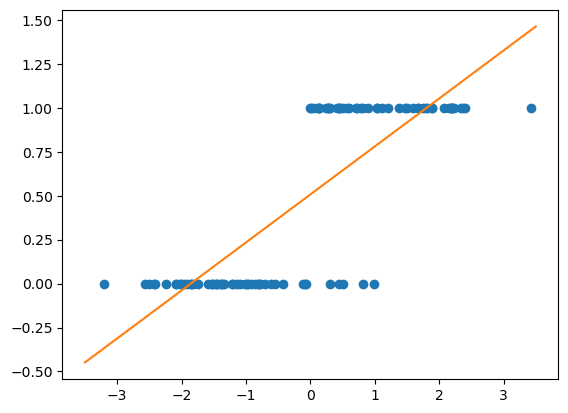

In [9]:
plt.plot(X,y,'o')
plt.plot(xgrid, yp)

In [10]:
ypfilt = np.zeros(xgrid.shape[0])
for i,x in enumerate(xgrid):
    if yp[i] >= 1.0:
        ypfilt[i] = 1.0
    elif yp[i] <= 0.0:
        ypfilt[i] = 0.0
    else:
        ypfilt[i] = yp[i]

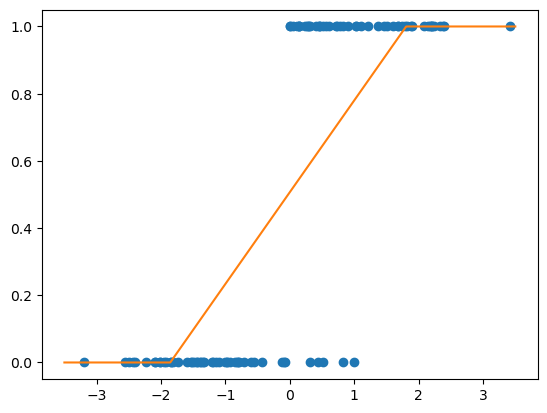

In [11]:
plt.plot(X,y,'o')
plt.plot(xgrid, ypfilt)

In [12]:
logr = LogisticRegression(C=10000).fit(X,y)
yp2 = logr.predict(Xgrid)

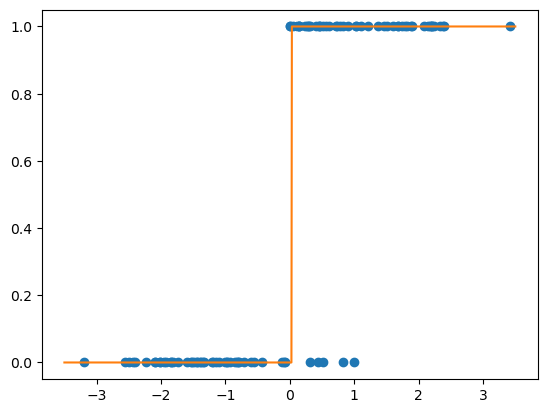

In [13]:
plt.plot(X,y,'o')
plt.plot(xgrid, yp2)

In [14]:
probs = logr.predict_proba(Xgrid)[:,1]

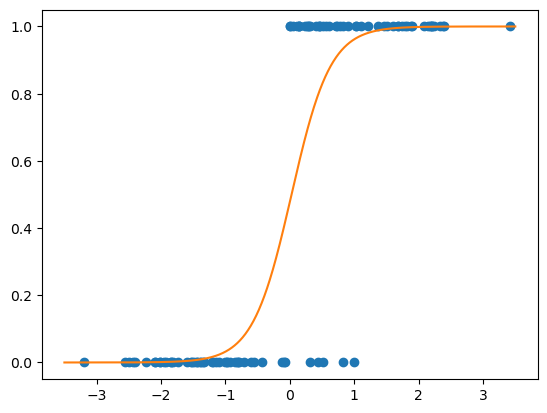

In [15]:
plt.plot(X,y,'o')
plt.plot(xgrid, probs)

In [16]:
import torch

In [17]:
# from https://www.stefanfiott.com/machine-learning/tensors-and-gradients-in-pytorch/
def tensor_properties(t, show_value=True):
    print('Tensor properties:')
    props = [('rank', t.dim()),
             ('shape', t.size()),
             ('data type', t.dtype),
             ('tensor type', t.type())]
    for s,v in props:
        print('\t{0:12}: {1}'.format(s,v))
    if show_value:
        #print('{0:12}: {1}'.format('value',t))
        print("Value:")
        print(t)

In [18]:
X_data = torch.from_numpy(X).float()
Y_data = torch.from_numpy(Y)
y_data = torch.from_numpy(y)

In [19]:
tensor_properties(Y_data)

Tensor properties:
	rank        : 2
	shape       : torch.Size([100, 1])
	data type   : torch.int64
	tensor type : torch.LongTensor
Value:
tensor([[1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
    

In [20]:
class Model(torch.nn.Module):

    def __init__(self):
        """
        In the constructor we instantiate nn.Linear module
        """
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1, 2)  # One in and two out
        self.lsm = torch.nn.LogSoftmax()

    def forward(self, x):
        linears = self.linear(x)
        logprobs = self.lsm(linears)
        return logprobs

In [21]:
model = Model()

In [22]:
# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the 
# nn.Linear modules which are members of the model.
criterion = torch.nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
accum = []
for epoch in range(2000):
    
    # Forward pass: Compute predicted y by passing x to the modela
    
    optimizer.zero_grad()
    
    prob_pred = model.forward(X_data)

    # Compute and print loss
    loss = criterion(prob_pred, y_data)
    accum.append(loss.item())
    #print(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    
    loss.backward()
    optimizer.step()

/Users/rahul/Courses/Hult/ml/simple-pytorch/.pixi/envs/default/lib/python3.11/site-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


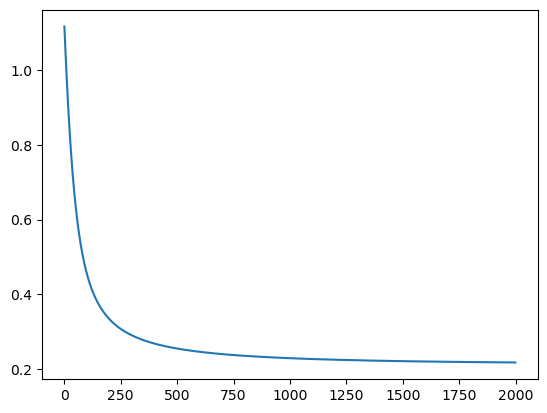

In [23]:
plt.plot(accum)

In [24]:
list(model.named_parameters())

[('linear.weight',
  Parameter containing:
  tensor([[-0.7855],
          [ 1.8566]], requires_grad=True)),
 ('linear.bias',
  Parameter containing:
  tensor([-0.4545, -0.4446], requires_grad=True))]

In [25]:
# After training
Xgrid_data = torch.from_numpy(Xgrid).float()
probs3 = model.forward(Xgrid_data)

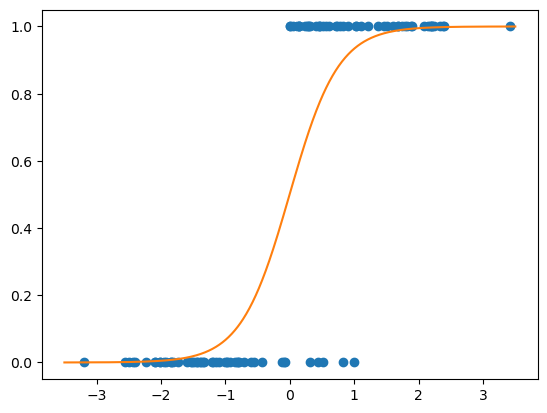

In [26]:
plt.plot(X,y,'o')
plt.plot(xgrid, np.exp(probs3.detach().numpy()[:,1]))

`model.forward()` (Forward Pass):

In simple terms, `model.forward()` is like asking your model to make a prediction based on the input you give it.

In code, when you do:

`outputs = model(inputs)`

This is actually calling `model.forward(inputs)` behind the scenes. 

It's like saying, "Hey model, take these inputs and give me your best guess at what the output should be."
For example, if you're doing image classification, this would be like showing an image to the model and asking it to guess what's in the image.

Loss Calculation:

After the forward pass, we compare the model's prediction to the actual correct answer:

`loss = criterion(outputs, targets)`

This calculates how far off the model's guess was from the correct answer. The bigger the loss, the worse the model's prediction.

`loss.backward()` (Backward Pass / Backpropagation):

`loss.backward()` is like telling the model, "Okay, you made a guess, and here's how wrong you were. Now figure out which parts of you need to change to make a better guess next time."

When you call:

`loss.backward()`

It starts a process called backpropagation. This process goes backwards through the model, calculating how much each part of the model contributed to the error. It's like tracing back through the model's "thought process" to see where it went wrong. This is where the calculus is all done!

Optimization Step:

After backpropagation, we use the optimizer to actually make the changes to the model:

`optimizer.step()`

This is like the model adjusting itself based on what it learned from its mistake. It is the gradient descent "plunge step" down the landscape.

Putting it all together:

Here's a simplified view of what's happening in each training iteration:

```python
# Forward pass: Model makes a guess
outputs = model(inputs)

# Calculate how wrong the guess was
loss = criterion(outputs, targets)

# Backward pass: Figure out how to improve
loss.backward()

# Make the improvement
optimizer.step()
```
This function encapsulates one full training epoch or iteration, where the model goes through all of these steps for each batch of data. Over many epochs, the model learns to make better and better predictions.

In essence:

- Forward pass (`model.forward()`) is the model making a prediction.
- Loss calculation is measuring how wrong the prediction was.
- Backward pass (`loss.backward()`) is figuring out how to improve.
- Optimization step is making those improvements.

This process repeats many times, with the model gradually getting better at making predictions.

